In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
# Check some package versions
print(gpd.__version__)
print(folium.__version__)

0.8.1
0.11.0


In [3]:
# Read in the parks dataset
parks = gpd.read_file('../data/metro_parks_boundaries.geojson')
print(parks.crs)
parks.head()

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


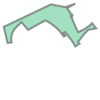

In [4]:
parks.loc[0, 'geometry']

In [5]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.95546524763979 36.07930145579854, -86.95577768867267 36.0791390934377, -86.95554165522448 36.07881679726515, -86.95555002481612 36.07876336296327, -86.95547131924887 36.07872072961796, -86.95532248405858 36.07851744306786, -86.95528618171004 36.07845372197693, -86.95525327758185 36.07839107173579, -86.95523923349029 36.07834887403824, -86.95522977080738 36.07832175489392, -86.95522131619775 36.07829407526238, -86.95521421491281 36.07826638490727, -86.95520846364511 36.07823840895774, -86.95520406570714 36.07821042318611, -86.95520101888307 36.0781821509104, -86.9551993253869 36.07815386881271, -86.95519898519579 36.07812557509128, -86.95519999833 36.07809727154806, -86.95520236476608 36.07806895638105, -86.9552057503346 36.07804090893737, -86.955210827808 36.0780128471868, -86.9550086936845 36.07817351059672, -86.95500864747362 36.07817345327956, -86.95499806745696 36.07816107206578, -86.9549716235682 36.07813012168268, -86.95500338104712 36.07803322156244, -86.9550

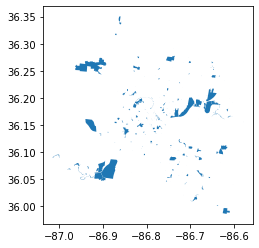

In [6]:
parks.plot();

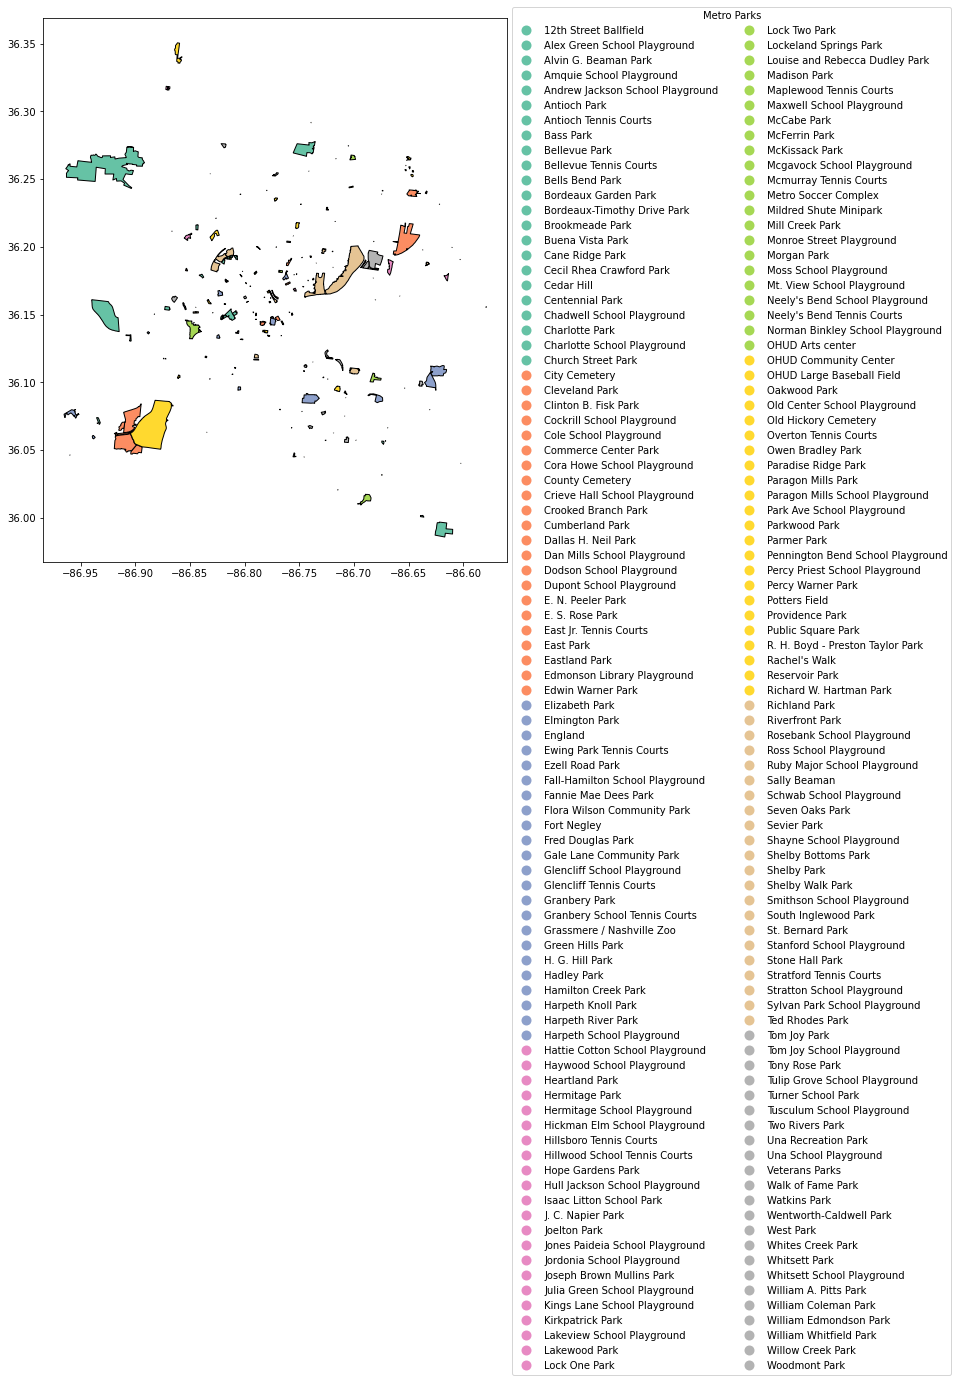

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Metro Parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [8]:
art = pd.read_csv('../data/public_art.csv')
print(art.shape)
art.head()

(164, 10)


,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)"
1,Water Fountain Shelter,Lewis,E.C.,"South 20th Street and Shelby Ave, Nashville, TN",Concrete,Sculpture,NaN,36.169860,-86.735950,"(36.16986, -86.73595)"
2,The Waterfall Mural,Deese,Bryan,"917 Woodland Street, Nashville TN",Latex paint and spray paint,Mural,Mural painted celebrating the band My Morning ...,36.175636,-86.755652,"(36.175636, -86.755652)"
3,Angel,Ralston,William,"4715 Harding Pike, Nashville TN",Stone on concrete and brick base,Sculpture,An elongated figure consisting of a stylized f...,36.119750,-86.853430,"(36.11975, -86.85343)"
4,The Peace Monument,Moretti,Giuseppe,"3381-3399 Granny White Pike, Nashville TN",Bronze on Carrera marble base,Sculpture,The Ladies Battlefield Association commissione...,36.114650,-86.792330,"(36.11465, -86.79233)"


In [12]:
art['geometry'] = art.apply(lambda x: Point((float(x.Latitude), float(x.Longitude))), axis=1)
art.head(3)

,Title,Artist Last Name,Artist First Name,Location,Medium,Type,Description,Latitude,Longitude,Mapped Location,geometry
0,Tommy Owen,LeQuire,Alan,"4001 Harding Road, Nashville TN",Bronze,Sculpture,NaN,36.128560,-86.836600,"(36.12856, -86.8366)",POINT (36.12856 -86.8366)
1,Water Fountain Shelter,Lewis,E.C.,"South 20th Street and Shelby Ave, Nashville, TN",Concrete,Sculpture,NaN,36.169860,-86.735950,"(36.16986, -86.73595)",POINT (36.16986 -86.73595)
2,The Waterfall Mural,Deese,Bryan,"917 Woodland Street, Nashville TN",Latex paint and spray paint,Mural,Mural painted celebrating the band My Morning ...,36.175636,-86.755652,"(36.175636, -86.755652)",POINT (36.175636 -86.755652)


In [14]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
art_geo = gpd.GeoDataFrame(art, crs = parks.crs, geometry = art['geometry'])